## Importing the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
from xgboost import XGBRegressor
import seaborn as sns
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt


sns.set()

## Loading Data

In [2]:
raw_data = pd.read_csv('1.06 STATION GALACHIPA.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2019,1,1,101.75,14.46,23.44,0.0,4.62,73.38,15.35,12.934,5.314,0.591,-1.032
1,2019,1,2,101.74,13.89,23.02,0.0,4.54,70.12,15.62,12.992,5.136,0.456,-1.011
2,2019,1,3,101.77,12.73,23.28,0.0,3.90,64.50,16.26,12.980,4.968,0.452,-1.055
3,2019,1,4,101.85,11.63,22.29,0.0,6.30,68.44,13.76,13.045,4.876,0.432,-0.814
4,2019,1,5,101.68,12.56,22.74,0.0,6.04,70.56,13.69,13.147,4.750,0.351,-0.970


## Handling Null Values

In [3]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 0
LOW                  0
dtype: int64

In [4]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2020.000000,6.521898,15.732664,100.838312,22.263193,28.270648,20.256989,6.413531,80.11000,24.239617,10.299108,11.332430,1.165382,-0.781486
std,0.816497,3.450561,8.805388,0.534903,4.738568,3.036868,46.388510,2.545048,8.23865,4.550932,3.616422,5.727137,0.462333,0.576054
min,2019.000000,1.000000,1.000000,99.160000,9.240000,19.080000,0.000000,1.750000,53.06000,13.520000,3.793000,2.427000,0.073800,-1.656200
25%,2019.000000,4.000000,8.000000,100.410000,18.840000,26.495000,0.000000,4.717500,74.75000,20.877500,6.696000,5.632750,0.833350,-1.136000
50%,2020.000000,7.000000,16.000000,100.875000,24.055000,29.295000,3.915000,5.945000,82.19000,26.455000,11.213000,12.027000,1.164000,-0.861000
75%,2021.000000,10.000000,23.000000,101.290000,26.230000,30.230000,21.230000,7.410000,86.69000,27.882500,13.570250,17.068750,1.505000,-0.553500
max,2021.000000,12.000000,31.000000,101.900000,28.000000,35.530000,533.680000,23.530000,92.75000,29.300000,15.071000,19.062000,2.549000,2.078000


## Distribution Check and Dealing With Outliers

In [5]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


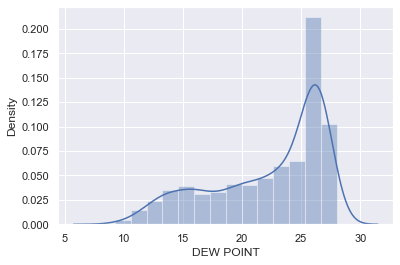

In [6]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


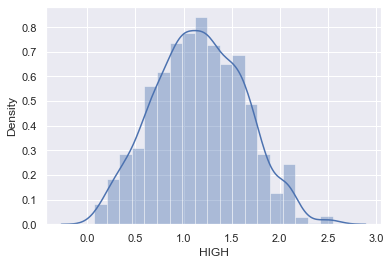

In [7]:
sns.distplot(df['HIGH'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


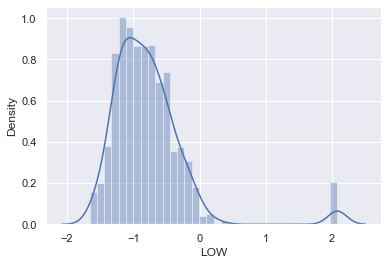

In [8]:
sns.distplot(df['LOW'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


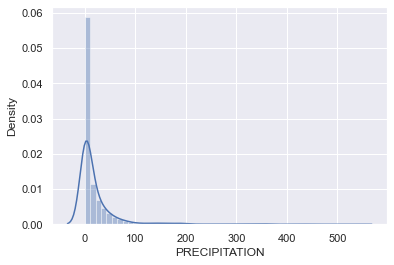

In [9]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


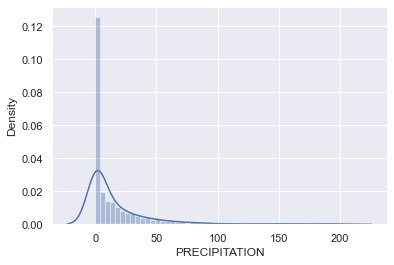

In [10]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [11]:
data_cleaned = data_1.reset_index(drop=True)

In [12]:
data_cleaned = data_cleaned.drop(['LOW'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,2020.005530,6.509677,15.728111,100.844581,22.219548,28.263834,16.873493,6.368691,80.006516,24.204332,10.326037,11.288076,1.161961
std,0.816101,3.461857,8.812353,0.532473,4.742142,3.050670,30.615241,2.515753,8.214024,4.559896,3.617809,5.734902,0.462809
min,2019.000000,1.000000,1.000000,99.160000,9.240000,19.080000,0.000000,1.750000,53.060000,13.520000,3.793000,2.427000,0.073800
25%,2019.000000,4.000000,8.000000,100.420000,18.820000,26.400000,0.000000,4.700000,74.690000,20.820000,6.697000,5.584000,0.826000
50%,2020.000000,7.000000,16.000000,100.880000,24.010000,29.300000,3.760000,5.920000,82.120000,26.400000,11.291000,11.953000,1.157000
75%,2021.000000,10.000000,23.000000,101.300000,26.220000,30.250000,20.790000,7.350000,86.620000,27.870000,13.575000,17.026000,1.498000
max,2021.000000,12.000000,31.000000,101.900000,28.000000,35.530000,203.260000,23.530000,92.750000,29.300000,15.071000,19.062000,2.549000


## Setting Targets(Labels) and Inputs

In [13]:
targets = data_cleaned['HIGH']
inputs = data_cleaned.drop(['HIGH'],axis=1)

## Polynomial Regression

### Scaling the data

In [14]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Model

In [16]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

### Training

In [17]:
reg_pol = LinearRegression()
reg_pol.fit(x_train_trans,y_train)
Train_score_PR = reg_pol.score(x_train_trans,y_train)
print("Training Score: ",Train_score_PR)

Training Score:  0.5445863024236351


### Testing

In [18]:
y_pred_pol = reg_pol.predict(x_test_trans)

In [19]:
Test_score_PR = r2_score(y_test,y_pred_pol)
print("Testing Score: ",Test_score_PR)

Testing Score:  0.502036336115306


In [20]:
mse = mean_squared_error(y_test, y_pred_pol)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.1011490410191252
RMSE : 0.0505745205095626


### Visulizing Predictions

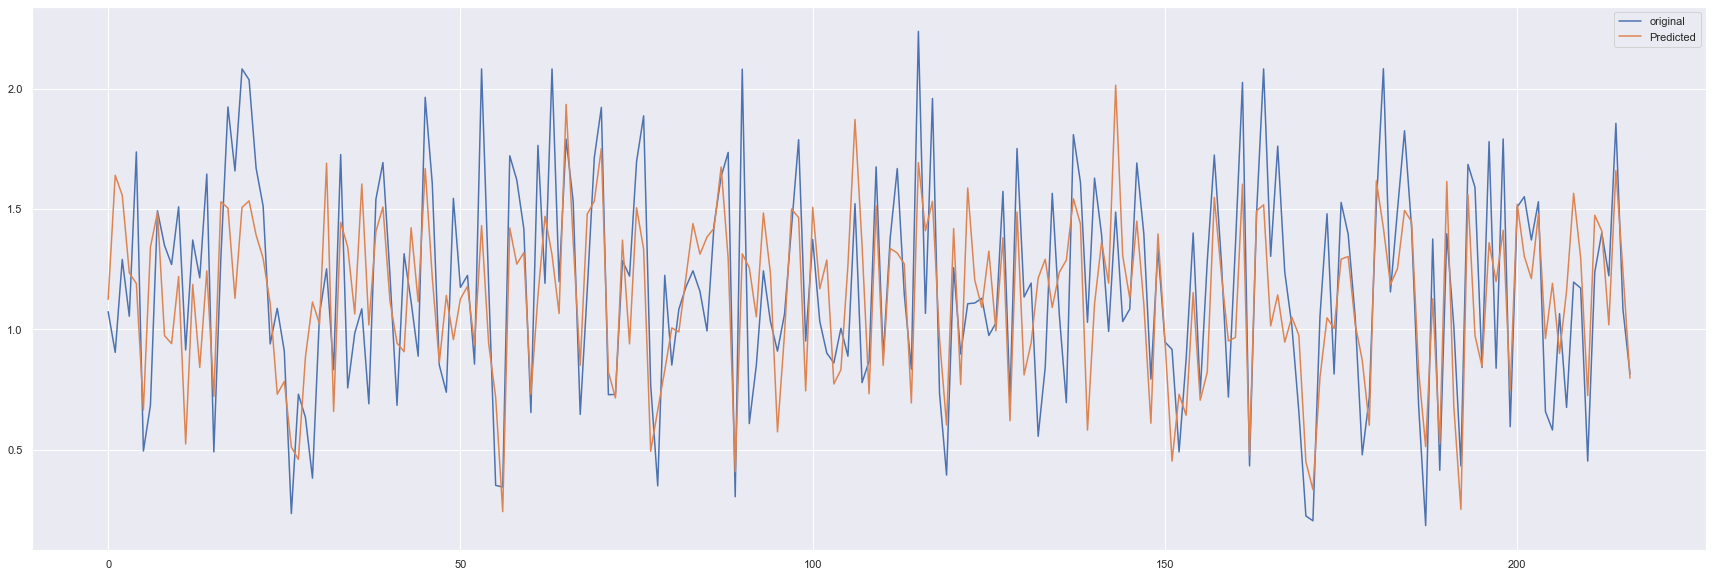

In [21]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_pol, label="Predicted")
plt.legend()
plt.show()


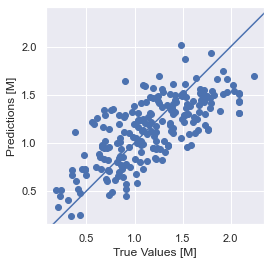

In [22]:
y_pred_pol = reg_pol.predict(x_test_trans).flatten()
plt.scatter(y_test, y_pred_pol)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Support Vector Regression

### Scaling the data

In [23]:
df_svr = data_cleaned
scaler=MinMaxScaler()
scaler.fit(inputs)
inputs_scaled_SVR = scaler.transform(inputs)

### Train-Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_SVR, targets, test_size=0.2, random_state=22)

### Model and Training

In [25]:
svr = SVR(kernel='rbf',C=70,epsilon=0.1)
svr.fit(x_train,y_train)
Train_score_SVR = svr.score(x_train,y_train)
print("Training Score: ",Train_score_SVR)

Training Score:  0.8342006052109279


### Testing

In [26]:
y_pred_svr = svr.predict(x_test)

In [27]:
Test_score_SVR = r2_score(y_test,y_pred_svr)
print("Testing Score: ",Test_score_SVR)

Testing Score:  0.6414755731590287


In [28]:
mse = mean_squared_error(y_test, y_pred_svr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.0794315466110262
RMSE : 0.0397157733055131


### Visualizing Predictions

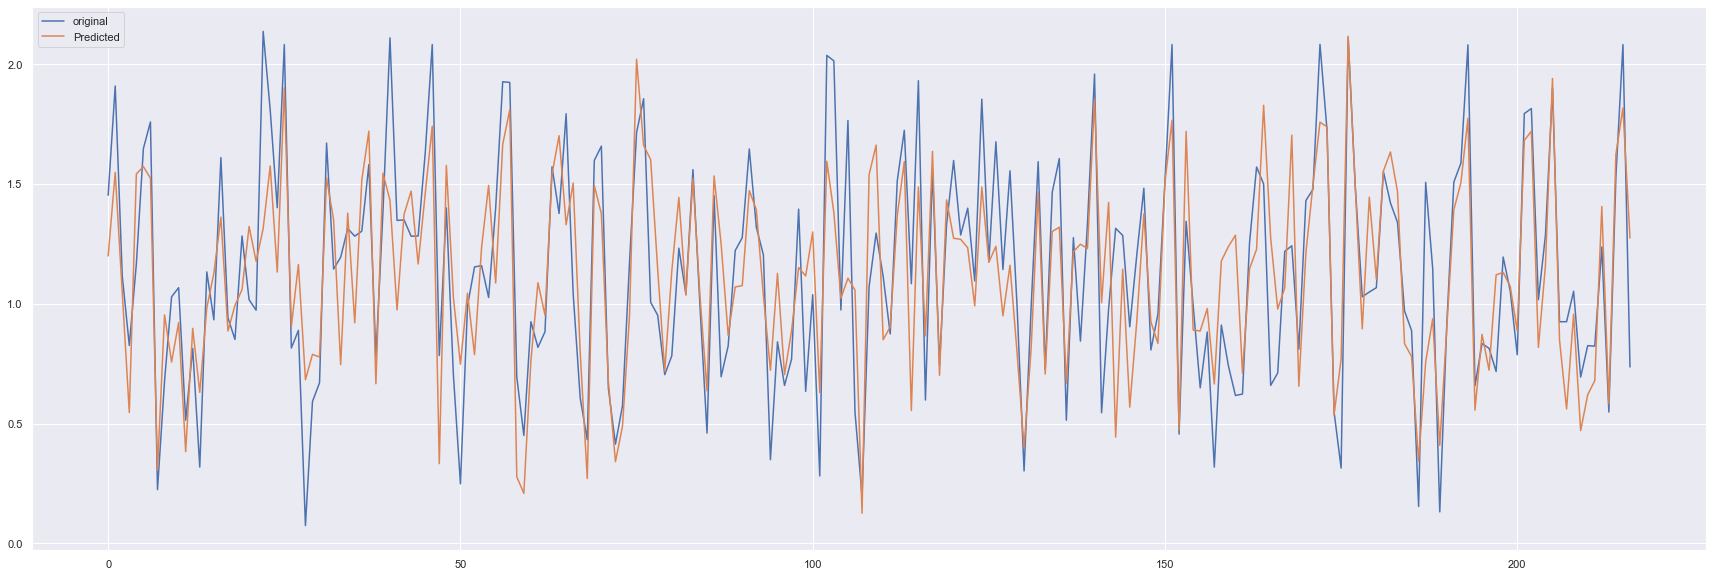

In [29]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_svr, label="Predicted")
plt.legend()
plt.show()

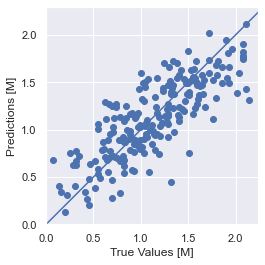

In [30]:
y_pred_svr = svr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## XGB Regressor

### Train-Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.15, random_state=22)

### Model

In [32]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


### Training

In [33]:
xgbr.fit(x_train,y_train)
Train_score_XGB = xgbr.score(x_train,y_train)
print("Training Score: ",Train_score_XGB)

Training Score:  0.9993309305682772


### Testing

In [34]:
y_pred_xgbr = xgbr.predict(x_test)
Test_score_XGB =  r2_score(y_test,y_pred_xgbr)
print("Testing Score: ",Test_score_XGB)

Testing Score:  0.6954883415023768


In [35]:
mse = mean_squared_error(y_test, y_pred_xgbr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.06645496753019732
RMSE : 0.03322748376509866


### Visualizing Predictions

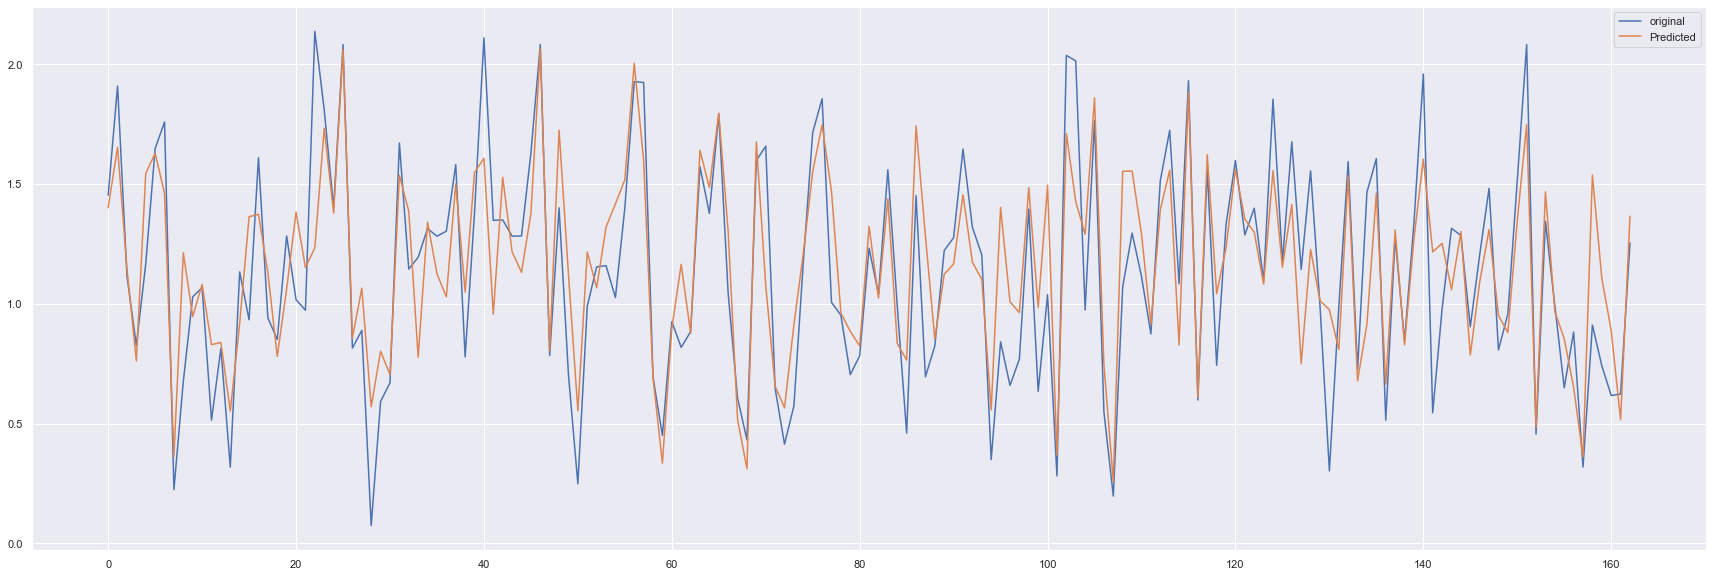

In [36]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_xgbr, label="Predicted")
plt.legend()
plt.show()

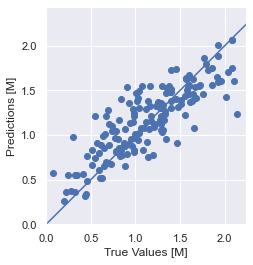

In [37]:
y_pred_xgbr = xgbr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_xgbr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Random Forest Regression Model

### Train-Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=22)

### Model

In [39]:
rfr = RandomForestRegressor(n_estimators=500,random_state=0)

### Training

In [40]:
rfr.fit(x_train,y_train)
Train_score_RFR = rfr.score(x_train,y_train)
print("Training Score: ",Train_score_RFR)

Training Score:  0.9574788417048652


### Testing

In [41]:
y_pred_rfr = rfr.predict(x_test)
Test_score_RFR =  r2_score(y_test,y_pred_rfr)
print("Testing Score: ",Test_score_RFR)

Testing Score:  0.6911622406753297


In [42]:
mse = mean_squared_error(y_test, y_pred_rfr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.06842340169453426
RMSE : 0.03421170084726713


### Visualizing Predictions

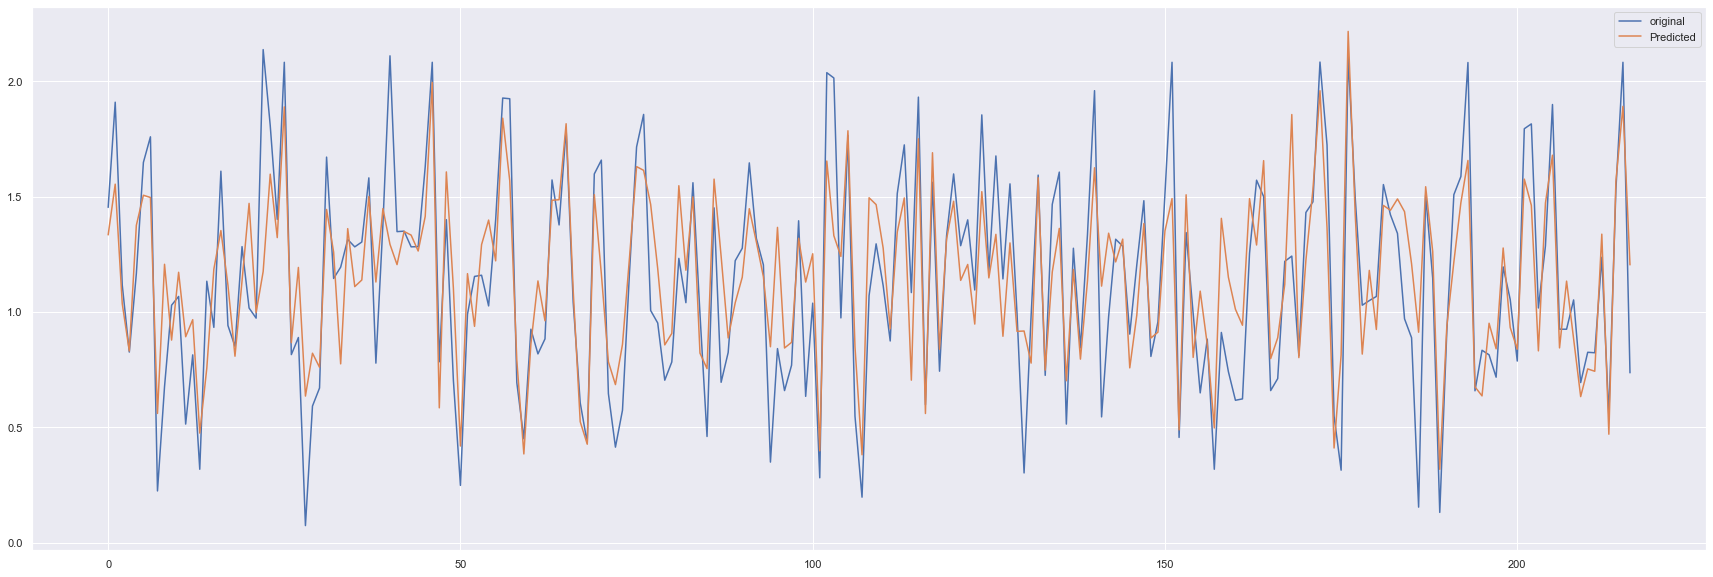

In [43]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_rfr, label="Predicted")
plt.legend()
plt.show()

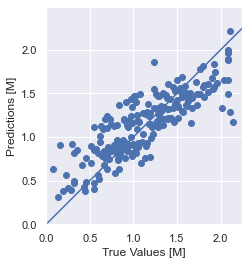

In [44]:
y_pred_rfr = rfr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()